### get the image

In [5]:
!wget -O sheep_fam.jpeg https://images.squarespace-cdn.com/content/v1/5f87b82c3640400719116914/57b6c537-5a4c-4469-b268-50031d9fe9b2/Fly+strike.png
img_path = "/content/sheep_fam.jpeg"

--2025-01-02 19:04:56--  https://images.squarespace-cdn.com/content/v1/5f87b82c3640400719116914/57b6c537-5a4c-4469-b268-50031d9fe9b2/Fly+strike.png
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2201047 (2.1M) [image/png]
Saving to: ‘sheep_fam.jpeg’

sheep_fam.jpeg      100%[===================>]   2.10M  --.-KB/s    in 0.09s   

2025-01-02 19:04:57 (22.6 MB/s) - ‘sheep_fam.jpeg’ saved [2201047/2201047]



In [2]:
import torch
import torchvision
from torchvision.io.image import decode_image
from torchvision.transforms.functional import to_pil_image
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [3]:
weights = torchvision.models.segmentation.FCN_ResNet101_Weights.DEFAULT
model = torchvision.models.segmentation.fcn_resnet101(weights=weights)

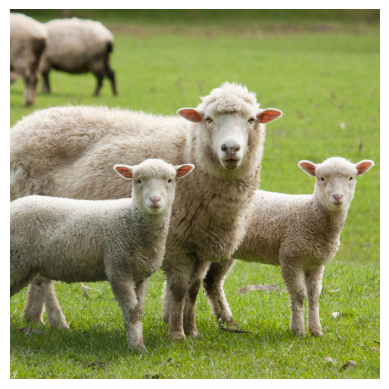

In [6]:
img = decode_image(img_path)
plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.show()

In [7]:
img.shape

torch.Size([4, 1080, 1080])

In [22]:
img = img[0:3]

In [23]:
# run inference on image
model.eval()
transforms = weights.transforms()
batch = transforms(img).unsqueeze(0) # add batch dimension

pred = model(batch)

In [24]:
pred = pred["out"]
normalized_mask = pred.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_mask[0, class_to_idx["sheep"]]
mask_img = to_pil_image(mask)


(-0.5, 1079.5, 1079.5, -0.5)

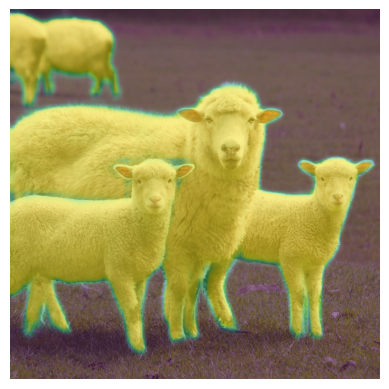

In [25]:
# Show the original image
plt.imshow(img.permute(1,2,0), cmap='gray')
plt.axis('off')

# Overlay the mask with transparency
fix_mask_size = img
plt.imshow(mask_img.resize(np.array(img.shape[-1::-1])[0:2]), cmap='viridis', alpha=0.5)  # Adjust alpha for transparency (0 = transparent, 1 = opaque)
plt.axis('off')

### doing it on my own

In [8]:
!wget -O cow.jpeg https://www.humanesociety.org/sites/default/files/styles/400x400/public/2018/08/cows-160067.png?h=4197855f&itok=-lWsEiV3
image_path = "/content/cow.jpeg"

--2025-01-02 19:05:15--  https://www.humanesociety.org/sites/default/files/styles/400x400/public/2018/08/cows-160067.png?h=4197855f
Resolving www.humanesociety.org (www.humanesociety.org)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.humanesociety.org (www.humanesociety.org)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245966 (240K) [image/png]
Saving to: ‘cow.jpeg’

cow.jpeg            100%[===================>] 240.20K  --.-KB/s    in 0.05s   

2025-01-02 19:05:15 (4.46 MB/s) - ‘cow.jpeg’ saved [245966/245966]



In [9]:
import torch
import torchvision
from PIL import Image
from torchvision.transforms.functional import to_pil_image
from torchvision.io.image import decode_image

import matplotlib.pyplot as plt

(-0.5, 399.5, 399.5, -0.5)

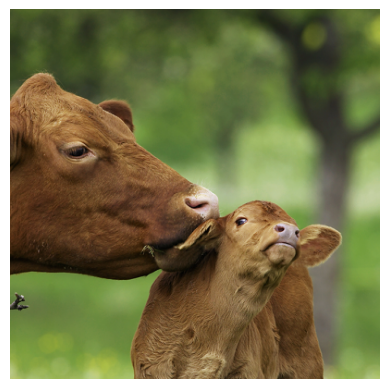

In [10]:
img = decode_image(image_path)
plt.imshow(img.permute(1,2,0))
plt.axis(False)

In [11]:
weights = torchvision.models.segmentation.FCN_ResNet101_Weights.DEFAULT
model = torchvision.models.segmentation.fcn_resnet101(weights=weights)

In [12]:
preprocessing = weights.transforms()

model.eval()
# transform input image
img_preprocessed = preprocessing(img).unsqueeze(0)
prediction = model(img_preprocessed)

normalized_mask = prediction["out"].softmax(dim=1)

class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}

mask = normalized_mask[0, class_to_idx["cow"]]

mask_img = to_pil_image(mask)

In [13]:
mask.shape, img.shape

(torch.Size([520, 520]), torch.Size([3, 400, 400]))

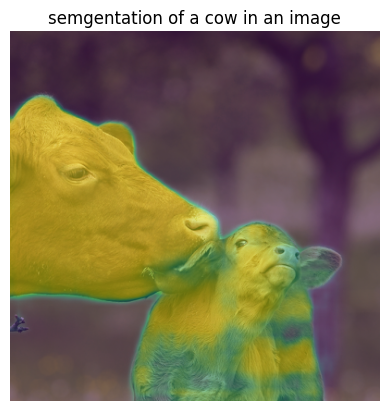

In [22]:
## plot image on mask
plt.imshow(img.permute(1,2,0))
plt.axis(False)

plt.imshow((mask_img.resize(np.array(img.shape)[-1::-1][:2])), alpha=0.5, cmap="viridis")
plt.title("semgentation of a cow in an image")
plt.axis(False)
plt.show()

array([400, 400])